# autoMLST Wrapper
Summary of [AutoMLST Wrapper](https://github.com/KatSteinke/automlst-simplified-wrapper) results from project: `[{{ project().name }}]`

## Description
A fork of [autoMLST](https://bitbucket.org/ziemertlab/automlst) with a simplified wrapper script bypassing additional organism selection.

In [1]:
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [2]:
report_dir = Path("../")

with open(report_dir / "automlst_wrapper/final.newick", "r") as f:
    data = f.readlines()

value_to_replace = [i.split(":")[0] for i in data[0].replace("(", "").split(",")]

new_dict = {}
df = pd.read_csv("../automlst_wrapper/df_genomes_tree.csv")
genome_ids = list(df.genome_id)
for g in genome_ids:
    for v in value_to_replace:
        if v.startswith(g.split(".")[0]):
            new_dict[v] = g
            value_to_replace.remove(v)

data = data[0]
for k in new_dict.keys():
    data = data.replace(k, new_dict[k])

with open("../automlst_wrapper/final_corrected.newick", "w") as f:
    f.write(data)

In [11]:
%%R
library("treeio")
library("ggtree")
library("tidyverse")
library("ggstar")
library("ggnewscale")
library("ggtreeExtra")
library("phangorn")

R[write to console]: Loading required package: ape

R[write to console]: 
Attaching package: ‘ape’


R[write to console]: The following object is masked from ‘package:ggtree’:

    rotate


R[write to console]: The following object is masked from ‘package:treeio’:

    drop.tip


R[write to console]: code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)



R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



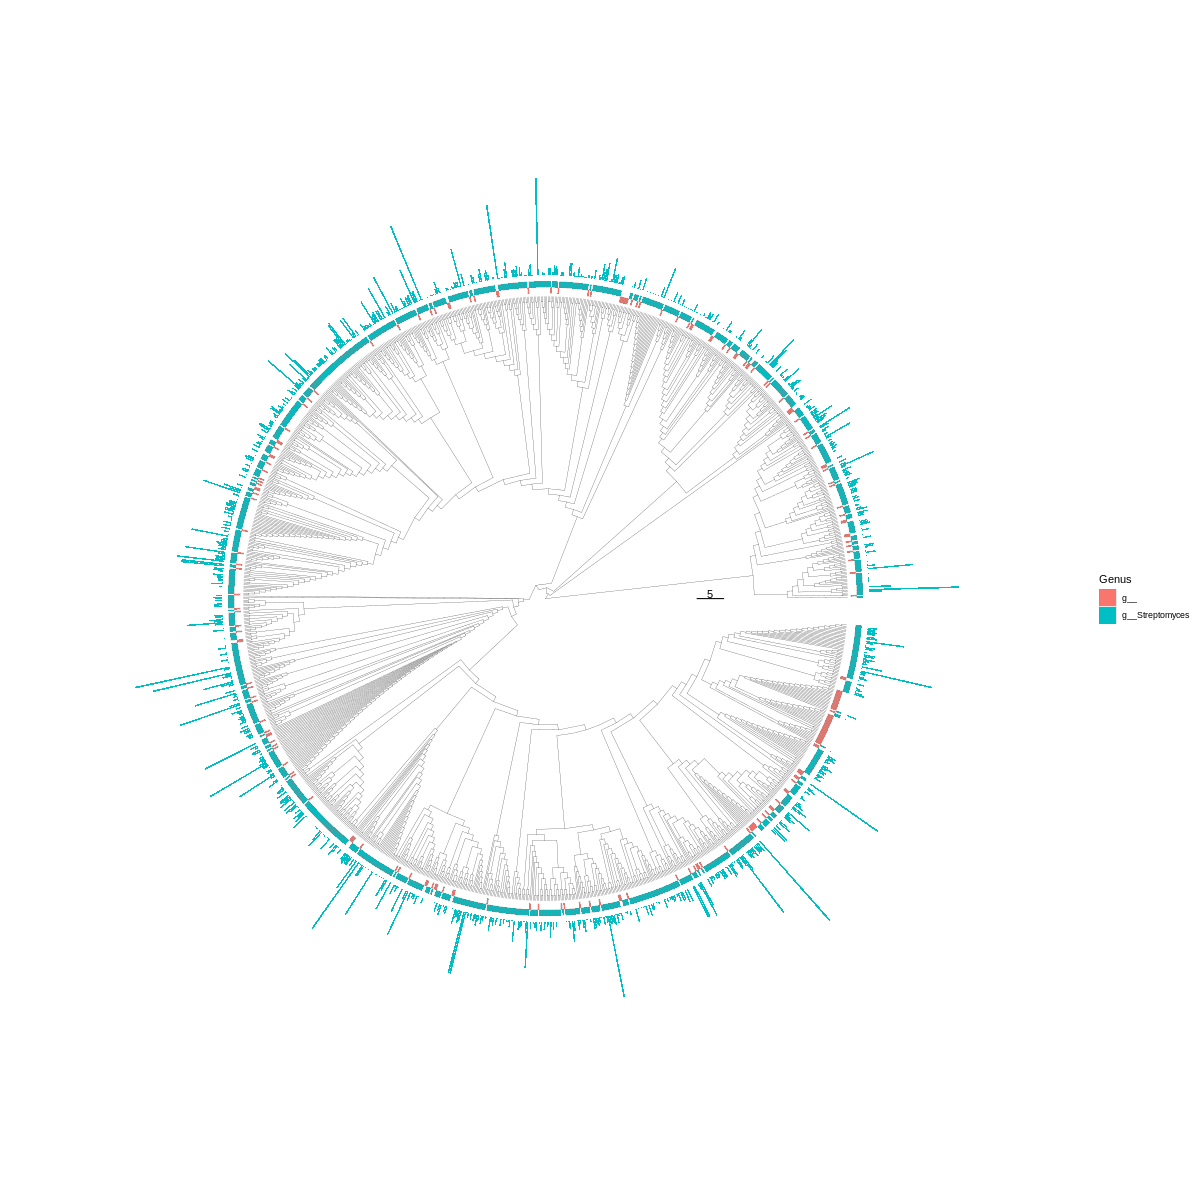

In [15]:
%%R  -w 1200 -h 1200
tree <- read.tree("../automlst_wrapper/final_corrected.newick")
#data <- read.csv("../automlst_wrapper/df_genomes_tree.csv")
data <- read.csv("../tables/df_gtdb_meta.csv")

# midpoint root
tree <- phangorn::midpoint(tree)
tree <- ladderize(reorder(tree))

# The circular layout tree.
p <- ggtree(tree, layout="fan", size=0.1, open.angle=5, branch.length='none')
p <- p %<+% data #+ geom_star(
                 #       mapping=aes(fill=Genus, starshape=Genus),#, size=genome_size),
                  #      position="identity",starstroke=0.1)
        
p2<- p + new_scale_fill() +
         geom_fruit(geom=geom_tile,
                  mapping=aes(y=genome_id, x=Genus, fill=Genus),
                  color = "grey50", offset = 0.01, pwidth=0.02) +
         scale_alpha_continuous(range=c(0, 1),
                             guide=guide_legend(keywidth = 0.05, 
                                             keyheight = 0.05, order=5)) 
p3 <- p2 + 
         geom_fruit(geom=geom_bar,
                    mapping=aes(y=genome_id, x=contig_count, fill=Genus),
                    pwidth=0.38, 
                    orientation="y", 
                    stat="identity") +
            geom_treescale() +
        theme()
p3

## References
<font size="2">
{% for i in project().rule_used['automlst-wrapper']['references'] %}
- *{{ i }}*
{% endfor %}
</font>